<a href="https://colab.research.google.com/github/Chii2401344/BCS102_Assignment/blob/main/BCS102_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0.0   Setting Up The Environment**

In [34]:
# Import dependencies
import pandas as pd # for data structures and functions
import numpy as np # for numeric operations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # label encoding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [35]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/HELP DEGREE/SEM2/BCS102 AI FUNDAMENTALS/ASSIGNMENT/healthcare-dataset-stroke-data.csv")

# Preview the first 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **1.0   Data Exploration**

In [37]:
# Check dataset dimensions
print("Dataset Dimensions: ", df.shape)

Dataset Dimensions:  (5110, 12)


In [38]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [39]:
# Describe numerical data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [40]:
# Check for sum of null values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [41]:
# Check for number of duplicate values
df.duplicated().sum()

np.int64(0)

In [42]:
# Renaming "Residence_type" for consistency
df.rename(columns={"Residence_type": "residence_type"}, inplace=True)

# Drop ID column, since it is a unique identifier and irrelevant for training
df.drop(columns='id', inplace=True)

print ("Updated Features: " , df.columns.tolist())

Updated Features:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [43]:
# Drop entries with null BMI
df.dropna(inplace=True)
# Check updated dataset dimensions
print("Updated Dimensions: ", df.shape)

Updated Dimensions:  (4909, 11)


In [44]:
# Checking count of unique values in the Gender column
print(df['gender'].value_counts())

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64


In [45]:
# Drop entries with "Other" Gender, since it is statistically insignificant
df = df[df['gender'] != 'Other']
# Check updated dataset dimensions
print("Updated Dimensions: ", df.shape)

Updated Dimensions:  (4908, 11)


# **2.0	Data Visualization**

In [46]:
# Import visualization dependencies
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual theme
sns.set(style="whitegrid")
stroke_palette = {0: "skyblue", 1: "salmon"}

**Target Variable Distribution**

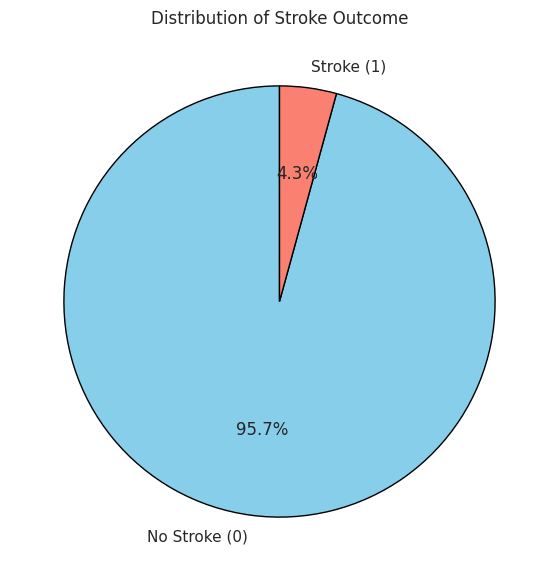

In [47]:
# Count the stroke outcomes
stroke_counts = df['stroke'].value_counts()
labels = ['No Stroke (0)', 'Stroke (1)']
colors = ['skyblue', 'salmon']

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Stroke Outcome')
plt.show()

**Feature Distributions**

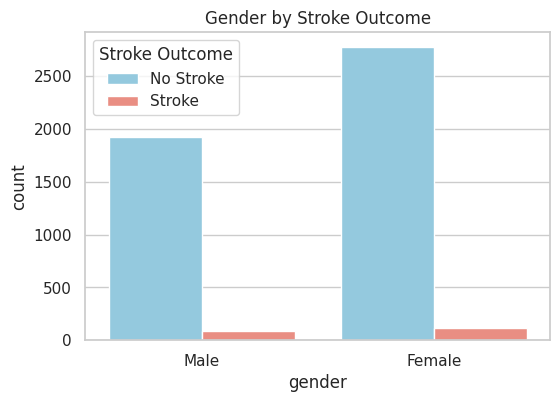

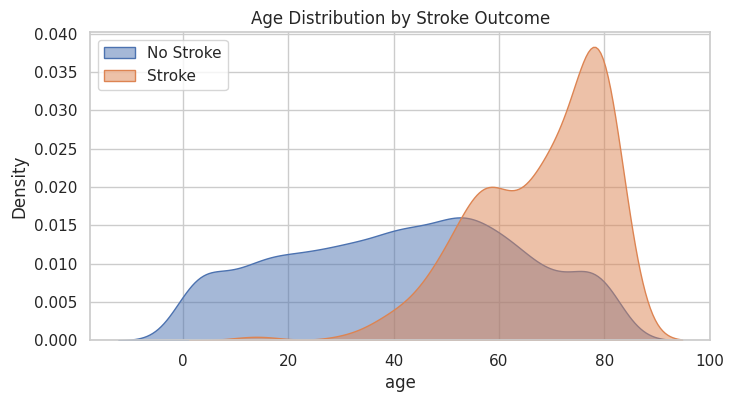

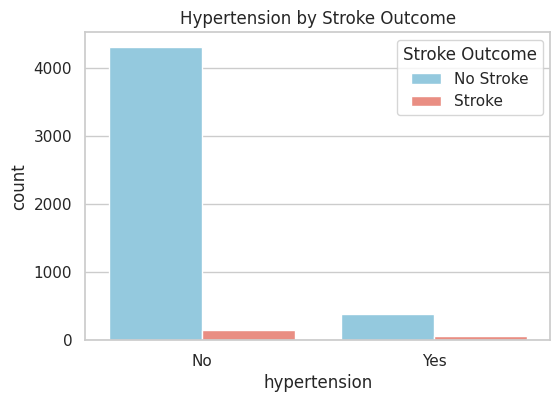

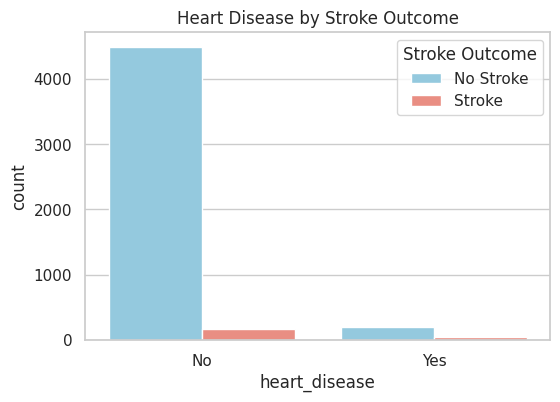

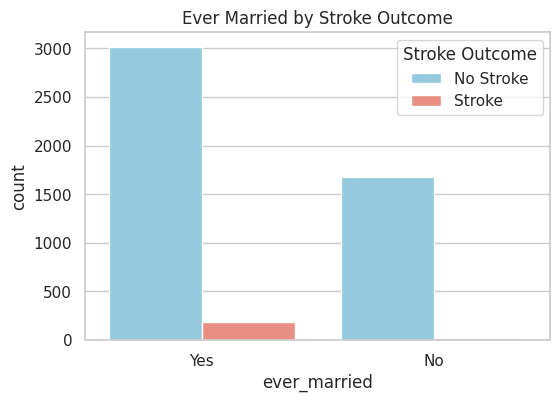

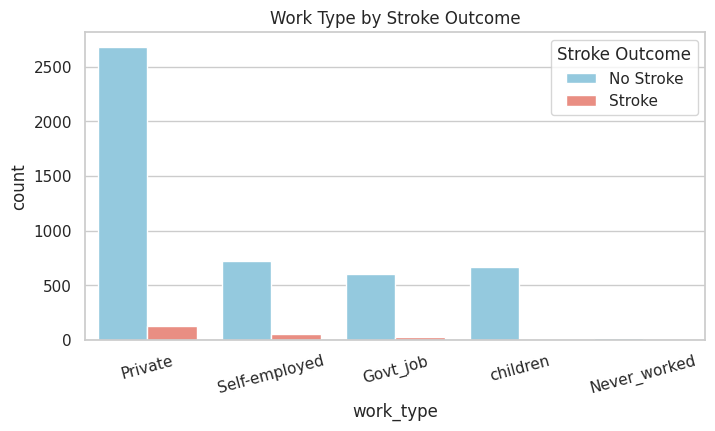

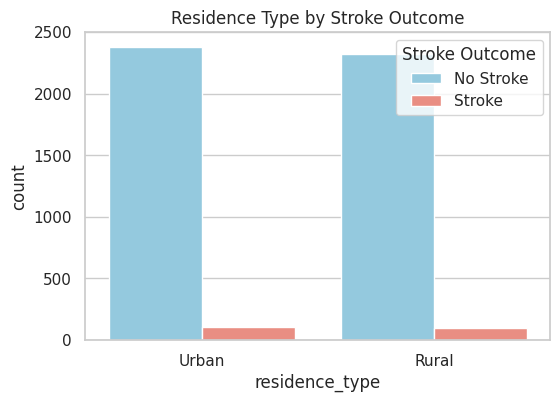

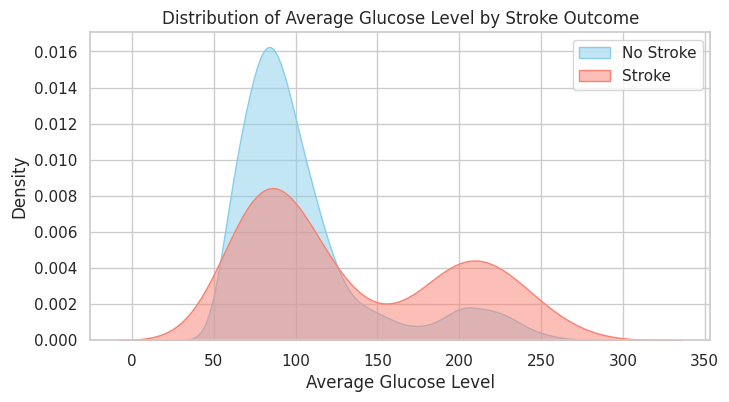

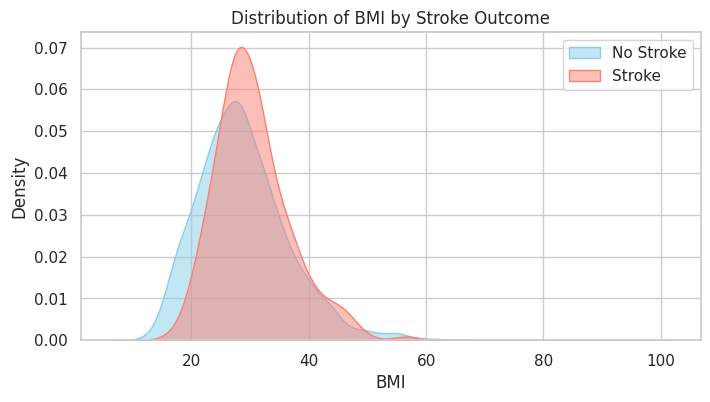

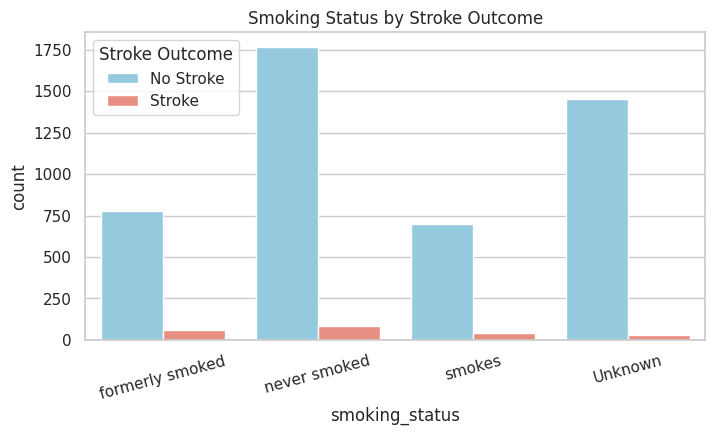

In [48]:
# 1. Gender by Stroke Outcome
plt.figure(figsize=(6,4))
gender_viz = sns.countplot(x="gender", hue="stroke", data=df, palette=stroke_palette)
plt.title("Gender by Stroke Outcome")
# Update legend to be human-readable
handles, labels = gender_viz.get_legend_handles_labels()
gender_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 2. Age Distribution by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', label='No Stroke', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['stroke'] == 1], x='age', label='Stroke', fill=True, alpha=0.5)
plt.title("Age Distribution by Stroke Outcome")
plt.legend()
plt.show()

# 3. Hypertension by Stroke Outcome
plt.figure(figsize=(6,4))
hyper_viz = sns.countplot(x="hypertension", hue="stroke", data=df, palette=stroke_palette)
plt.title("Hypertension by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = hyper_viz.get_legend_handles_labels()
hyper_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

# 4. Heart Disease by Stroke Outcome
plt.figure(figsize=(6,4))
heart_viz = sns.countplot(x="heart_disease", hue="stroke", data=df, palette=stroke_palette)
plt.title("Heart Disease by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = heart_viz.get_legend_handles_labels()
heart_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

# 5. Ever Married by Stroke Outcome
plt.figure(figsize=(6,4))
married_viz = sns.countplot(x="ever_married", hue="stroke", data=df, palette=stroke_palette)
plt.title("Ever Married by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = married_viz.get_legend_handles_labels()
married_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 6. Work Type by Stroke Outcome
plt.figure(figsize=(8,4))
work_viz = sns.countplot(x="work_type", hue="stroke", data=df, palette=stroke_palette)
plt.title("Work Type by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = work_viz.get_legend_handles_labels()
work_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(rotation=15)
plt.show()

# 7. Residence Type by Stroke Outcome
plt.figure(figsize=(6,4))
res_viz = sns.countplot(x="residence_type", hue="stroke", data=df, palette=stroke_palette)
plt.title("Residence Type by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = res_viz.get_legend_handles_labels()
res_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.show()

# 8. Distribution of Avg Glucose Level by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', label='No Stroke', fill=True, alpha=0.5, color='skyblue')
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', label='Stroke', fill=True, alpha=0.5, color='salmon')
plt.title("Distribution of Average Glucose Level by Stroke Outcome")
plt.xlabel("Average Glucose Level")
plt.legend()
plt.show()

# 9. Distribution of BMI by Stroke Outcome
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['stroke'] == 0], x='bmi', label='No Stroke', fill=True, alpha=0.5, color='skyblue')
sns.kdeplot(data=df[df['stroke'] == 1], x='bmi', label='Stroke', fill=True, alpha=0.5, color='salmon')
plt.title("Distribution of BMI by Stroke Outcome")
plt.xlabel("BMI")
plt.legend()
plt.show()

# 10. Smoking Status by Stroke Outcome
plt.figure(figsize=(8,4))
smoke_viz = sns.countplot(x="smoking_status", hue="stroke", data=df, palette=stroke_palette)
plt.title("Smoking Status by Stroke Outcome")
# Update legend and labels to be human-readable
handles, labels = smoke_viz.get_legend_handles_labels()
smoke_viz.legend(handles, ["No Stroke", "Stroke"], title="Stroke Outcome")
plt.xticks(rotation=15)
plt.show()

**Correlation Analysis/Matrix**

# **3.0 Data Preparation and Preprocessing**

In [49]:
# Seperate categorical and numerical columns/features
# Initalize OneHotEncoder
# InitializeLabelEncoder